# Import packages

In [1]:
# import core packages
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations
import os
import copy 
# import semi-core packages
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
plt.style.use('seaborn-v0_8-poster')
import numpy as np
import pandas as pd
from multiprocessing import Pool

# import open2c libraries
import bioframe
import coolpuppy
from coolpuppy import coolpup, plotpup
import cooler
import cooltools
from cooltools import insulation
import cooltools.lib.plotting
from cooltools.lib import common, checks

from packaging import version
if version.parse(cooltools.__version__) < version.parse('0.5.2'):
    raise AssertionError("tutorial relies on cooltools version 0.5.2 or higher,"+
                         "please check your cooltools version and update to the latest")

# count cpus
num_cpus = os.getenv('SLURM_CPUS_PER_TASK')
if not num_cpus:
    num_cpus = os.cpu_count()
num_cpus = int(num_cpus)
print(num_cpus)

10


In [2]:
figDir = '../figure/TAD'
os.makedirs(figDir, exist_ok=True)
coolDir = "../data/cool_norm_pooled"
outDir = "../data/TAD"
os.makedirs(outDir, exist_ok=True)

In [30]:
clr = cooler.Cooler(os.path.join(coolDir, "G1DMSO_pooled_5000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_G1DMSO_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_DMSO = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        #mindist = 0,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)

clr = cooler.Cooler(os.path.join(coolDir, "G1dTAG_pooled_5000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_G1DMSO_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_dTAG = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        #mindist = 0,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)

clr = cooler.Cooler(os.path.join(coolDir, "G1A485_pooled_5000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_G1DMSO_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_A485 = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        #mindist = 0,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)

clr = cooler.Cooler(os.path.join(coolDir, "GSE178982_AsyncUT_pooled_5000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_GSE178982_AsyncUT_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_UT = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        #mindist = 0,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)

clr = cooler.Cooler(os.path.join(coolDir, "GSE178982_AsyncAID_pooled_5000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_GSE178982_AsyncUT_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_AID = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        #mindist = 0,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)

INFO:coolpuppy:('chr10', 'chr10'): 177
INFO:coolpuppy:('chr7', 'chr7'): 186
INFO:coolpuppy:('chr6', 'chr6'): 190
INFO:coolpuppy:('chr4', 'chr4'): 187
INFO:coolpuppy:('chr8', 'chr8'): 140
INFO:coolpuppy:('chr9', 'chr9'): 157
INFO:coolpuppy:('chr5', 'chr5'): 170
INFO:coolpuppy:('chr3', 'chr3'): 180
INFO:coolpuppy:('chr13', 'chr13'): 166
INFO:coolpuppy:('chr17', 'chr17'): 113
INFO:coolpuppy:('chr15', 'chr15'): 133
INFO:coolpuppy:('chr16', 'chr16'): 119
INFO:coolpuppy:('chr18', 'chr18'): 117
INFO:coolpuppy:('chr2', 'chr2'): 238
INFO:coolpuppy:('chr14', 'chr14'): 133
INFO:coolpuppy:('chr19', 'chr19'): 78
INFO:coolpuppy:('chr12', 'chr12'): 141
INFO:coolpuppy:('chr1', 'chr1'): 231
INFO:coolpuppy:('chrX', 'chrX'): 177
INFO:coolpuppy:('chr11', 'chr11'): 152
INFO:coolpuppy:('chr7', 'chr7'): 186
INFO:coolpuppy:('chr6', 'chr6'): 190
INFO:coolpuppy:('chr10', 'chr10'): 177
INFO:coolpuppy:('chr9', 'chr9'): 157
INFO:coolpuppy:('chr4', 'chr4'): 187
INFO:coolpuppy:('chr8', 'chr8'): 140
INFO:coolpuppy:('

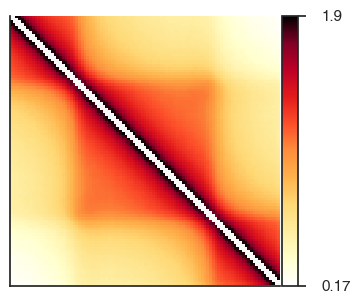

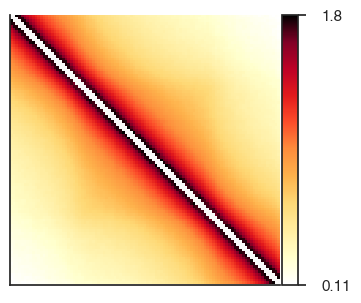

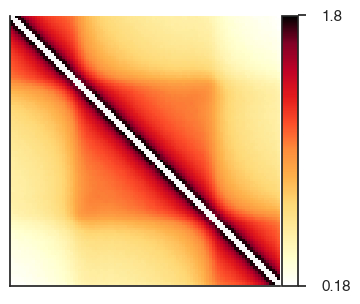

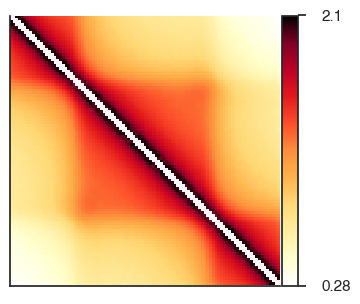

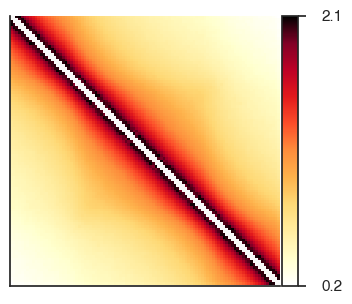

In [38]:
vmax = -1.5
vmin = -3.2
cmap = 'fall'
puptemp = copy.deepcopy(pileup_df_DMSO)
puptemp.data[0] = np.log10(puptemp.data[0]*10000)
fg1 = plotpup.plot(puptemp,
                   score = False,
                   cmap = cmap,
                   scale = 'linear', height=4, font = 'Helvetica')

puptemp = copy.deepcopy(pileup_df_dTAG)
puptemp.data[0] = np.log10(puptemp.data[0]*10000)
fg2 = plotpup.plot(puptemp,
                   score = False,
                   cmap = cmap,
                   scale = 'linear', height=4, font = 'Helvetica')

puptemp = copy.deepcopy(pileup_df_A485)
puptemp.data[0] = np.log10(puptemp.data[0]*10000)
fg3 = plotpup.plot(puptemp,
                   score = False,
                   cmap = cmap,
                   scale = 'linear', height=4, font = 'Helvetica')

puptemp = copy.deepcopy(pileup_df_UT)
puptemp.data[0] = np.log10(puptemp.data[0]*10000)
fg4 = plotpup.plot(puptemp,
                   score = False,
                   cmap = cmap,
                   scale = 'linear', height=4, font = 'Helvetica')

puptemp = copy.deepcopy(pileup_df_AID)
puptemp.data[0] = np.log10(puptemp.data[0]*10000)
fg5 = plotpup.plot(puptemp,
                   score = False,
                   cmap = cmap,
                   scale = 'linear', height=4, font = 'Helvetica')

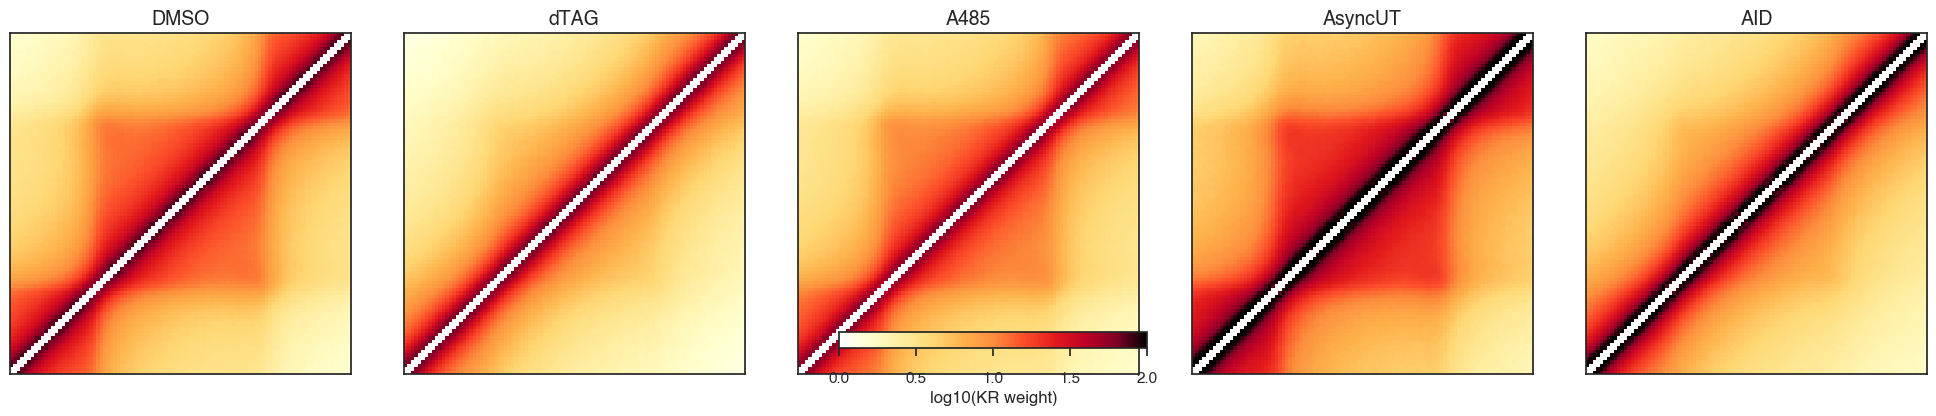

In [40]:
mats = [
    np.log10(pileup_df_DMSO.data[0]*10000),
    np.log10(pileup_df_dTAG.data[0]*10000),
    np.log10(pileup_df_A485.data[0]*10000),
    np.log10(pileup_df_UT.data[0]*10000),
    np.log10(pileup_df_AID.data[0]*10000),
]
labels = ["DMSO", "dTAG", "A485", "AsyncUT", "AID"]   # whatever you want your titles to be

# 2) set up the figure and axes
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharex=True, sharey=True)

# vmin/vmax from your variables
vmin, vmax = 0, 2
cmap = 'fall'

# 3) plot into each axis
for ax, mat, title in zip(axes, mats, labels):
    im = ax.imshow(
        mat,
        origin="lower",
        interpolation="nearest",
        cmap=cmap,
        vmin=vmin,
        vmax=vmax
    )
    ax.set_title(title, fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

# 4) single colorbar at bottom
#    ax=axes tells matplotlib that this bar should span all five subplots
cbar = fig.colorbar(
    im,
    ax=axes,
    orientation="horizontal",
    fraction=0.05,    # width of colorbar as fraction of total width
    pad=0.12          # space between subplots and colorbar
)
cbar.set_label("log10(KR weight)", fontsize=12)

plt.tight_layout()
plt.show()